<a href="https://colab.research.google.com/github/rezamohamadlo/Image-Compression-With-K-Means/blob/main/Image_Compression_With_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

using the K-means algorithm for image compression by reducing the number of colors that occur in an image to only those that are most common in that image.

In [1]:
# Importing the NumPy library for numerical operations
import numpy as np

# Importing the Matplotlib library for data visualization
import matplotlib.pyplot as plt

# Importing utility functions from a custom module named 'utils'
from utils import *

# Enabling inline plotting in Jupyter notebooks, so plots are displayed directly below the code cells
%matplotlib inline

In [2]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example

    Args:
        X (ndarray): (m, n) Input values
        centroids (ndarray): k centroids

    Returns:
        idx (array_like): (m,) closest centroids

    """

    # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly
    idx = np.zeros(X.shape[0], dtype=int)

    ### START CODE HERE ###
    for i in range(X.shape[0]):
          # Array to hold distance between X[i] and each centroids[j]
          distance = []
          for j in range(centroids.shape[0]):
              norm_ij = np.linalg.norm(X[i] - centroids[j])
              distance.append(norm_ij)

          idx[i] = np.argmin(distance)

    ### END CODE HERE ###

    return idx

In [3]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the
    data points assigned to each centroid.

    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each
                       example in X. Concretely, idx[i] contains the index of
                       the centroid closest to example i
        K (int):       number of centroids

    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """

    # Useful variables
    m, n = X.shape

    # You need to return the following variables correctly
    centroids = np.zeros((K, n))

    ### START CODE HERE ###
    for k in range(K):
          points = X[idx == k]
          centroids[k] = np.mean(points, axis = 0)

    ### END CODE HERE ##

    return centroids

In [4]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """

    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)

    # Run K-Means
    for i in range(max_iters):

        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))

        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)

        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids

        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show()
    return centroids, idx

In [5]:
def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be
    used in K-Means on the dataset X

    Args:
        X (ndarray): Data points
        K (int):     number of centroids/clusters

    Returns:
        centroids (ndarray): Initialized centroids
    """

    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])

    # Take the first K examples as centroids
    centroids = X[randidx[:K]]

    return centroids

In [6]:
# Load an image of a bird
original_img = plt.imread('bird_small.png')

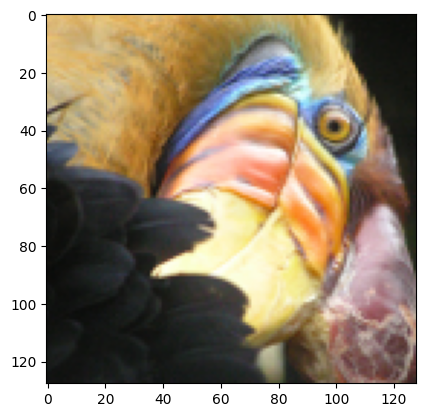

In [7]:
# Visualizing the image
plt.imshow(original_img)

In [8]:
# Print the shape of the original image array
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (128, 128, 3)


In [9]:
# Divide by 255 so that all values are in the range 0 - 1
original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [10]:
# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 16
max_iters = 10

# Using the function you have implemented above.
initial_centroids = kMeans_init_centroids(X_img, K)

# Run K-Means - this takes a couple of minutes
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


In [11]:
# Print the shape of the idx array, which contains the index of the closest centroid for each pixel
print("Shape of idx:", idx.shape)

# The shape of idx should be (m,) where m is the number of pixels in the image,
# indicating that each pixel has been assigned to one of the K centroids.

# Print the indices of the closest centroids for the first five pixels
print("Closest centroid for the first five elements:", idx[:5])

# This output shows which centroid each of the first five pixels in X_img is assigned to.
# These indices correspond to the centroids computed during the K-Means clustering process.

Shape of idx: (16384,)
Closest centroid for the first five elements: [4 4 4 4 4]


In [12]:
# Represent image in terms of indices
X_recovered = centroids[idx, :]

# Reshape recovered image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape)

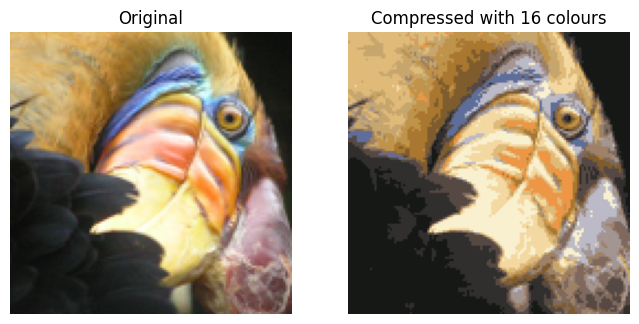

In [13]:
# Create a figure with 1 row and 2 columns to display both the original and compressed images
fig, ax = plt.subplots(1, 2, figsize=(8, 8))

# Turn off the axis for a cleaner look
plt.axis('off')

# Display the original image in the first subplot
# Multiply by 255 to revert back to the original pixel value range [0, 255]
ax[0].imshow(original_img * 255)
ax[0].set_title('Original')  # Set the title for the original image
ax[0].set_axis_off()         # Hide the axes for a cleaner view

# Display the compressed image in the second subplot
# Again, multiply by 255 to revert back to the original pixel value range
ax[1].imshow(X_recovered * 255)
ax[1].set_title('Compressed with %d colours' % K)  # Set the title indicating number of colors used
ax[1].set_axis_off()         # Hide the axes for a cleaner view

# Show the figure with both images side by side
plt.show()